In [1]:
!ls

Ecommerce_Purchases.csv  Project1.ipynb  README.md  test.txt


In [3]:
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
e_pur = pd.read_csv('Ecommerce_Purchases.csv')

Top 5 Job have nearly same purchase amount


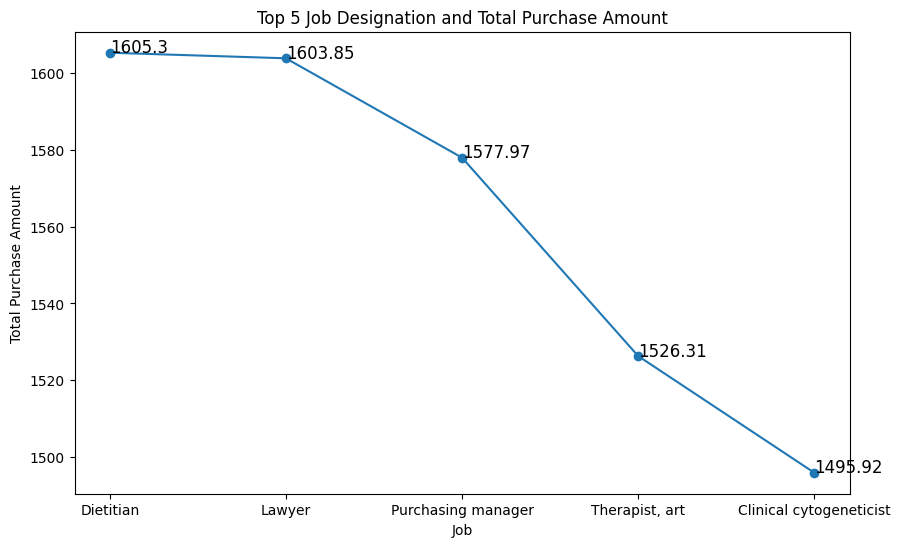

In [12]:
#1. Find the relationship between top 5 Job designation and total Purchase amount
job_pur_total = e_pur.groupby('Job')['Purchase Price'].agg(['sum'])
sort_job_pur_total = job_pur_total.sort_values(by=['sum'], ascending=False)
top_5_total = sort_job_pur_total.head(5)

plt.figure(figsize=(10,6))
plt.plot(top_5_total, marker='o')

for i, val in enumerate(top_5_total['sum']):
    plt.annotate(f'{val}', (i,val), fontsize=12)
    
plt.title('Top 5 Job Designation and Total Purchase Amount')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Job')

print('Top 5 Job have nearly same purchase amount')
plt.show()

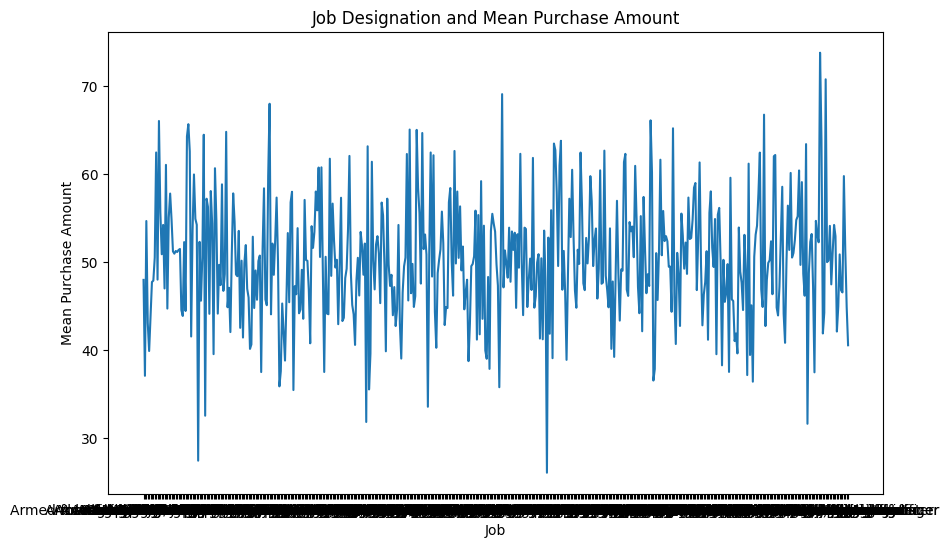

In [13]:
#2. Find the relationship between Job designation and mean Purchase amount
e_pur['Job Designation'] = e_pur['Job'].str.split(',').str[0]
job_pur_mean = e_pur.groupby('Job Designation')['Purchase Price'].agg(['mean'])

plt.figure(figsize=(10,6))
plt.plot(job_pur_mean )
plt.title('Job Designation and Mean Purchase Amount')
plt.ylabel('Mean Purchase Amount')
plt.xlabel('Job')
plt.show()

Buyer like using Mozilla then Opera to purchase goods


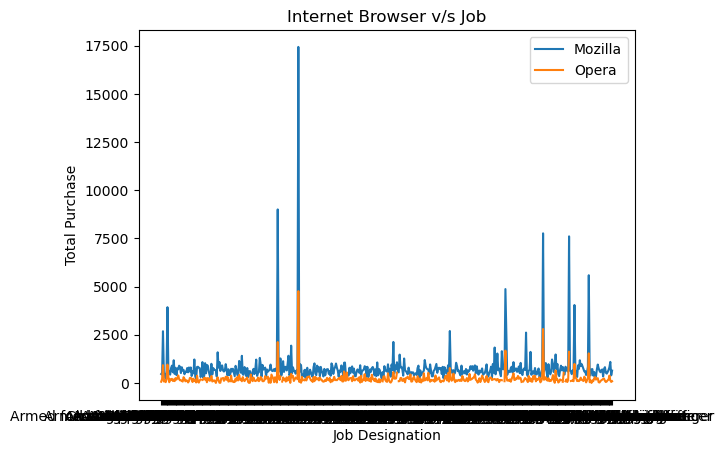

In [86]:
#3. How does purchase value depend on the Internet Browser used and Job (Profession) of the purchaser?
e_pur['Internet Browser'] = e_pur['Browser Info'].str.split('/').str[0]
e_pur['Job Designation'] = e_pur['Job'].str.split(',').str[0]

job_internet_total = e_pur.groupby(['Internet Browser','Job Designation'])['Purchase Price'].agg(['sum']).reset_index()
pivot_internet_job = job_internet_total.pivot(index ='Job Designation' , columns='Internet Browser', values='sum' )

plt.plot(pivot_internet_job)
plt.title('Internet Browser v/s Job')
plt.ylabel('Total Purchase')
plt.xlabel('Job Designation')
plt.legend(['Mozilla','Opera'])
  
print('Buyer like using Mozilla than Opera to purchase goods')
plt.show()

total purcharses of three states, including AP, AA, AE, are almost double those of other states in both the morning and evening


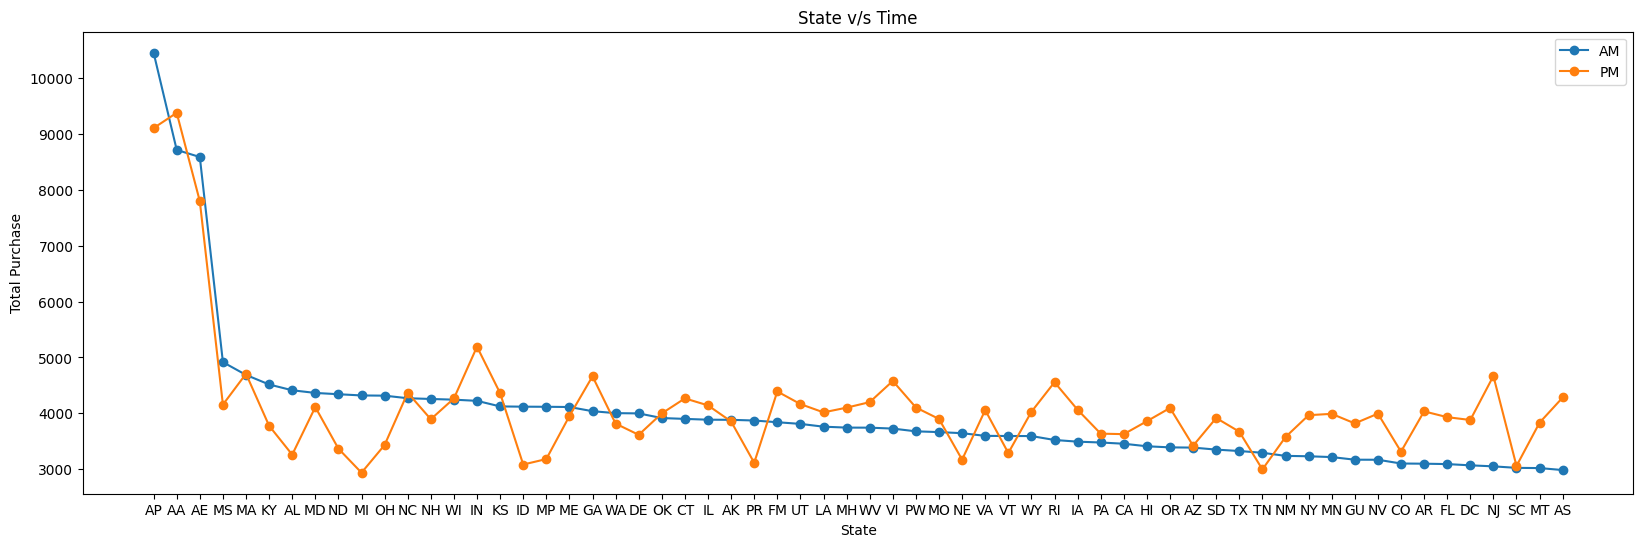

In [36]:
#4. What are the patterns, if any, on the purchases based on Location (State) and time of purchase (AM or PM)?
e_pur['Address']
e_pur['State'] = e_pur['Address'].str.split(' ').str[-2]
location_state_total = e_pur.groupby(['State','AM or PM'])['Purchase Price'].agg(['sum']).reset_index()
pivot_location_state_total  = location_state_total.pivot(index ='State', columns='AM or PM', values='sum')
sort_pivot = pivot_location_state_total.sort_values(by=['AM'], ascending=False)

plt.figure(figsize=(20,6))
plt.plot(sort_pivot, marker ='o' )
plt.title('State v/s Time')
plt.ylabel('Total Purchase')
plt.xlabel('State')
plt.legend(['AM','PM'])

print("total purcharses of three states, including AP, AA, AE, are almost double those of other states in both the morning and evening")
plt.show()


only people own American and Voyager CC purchased in the morning more than in the evening, 
other types do the opposite


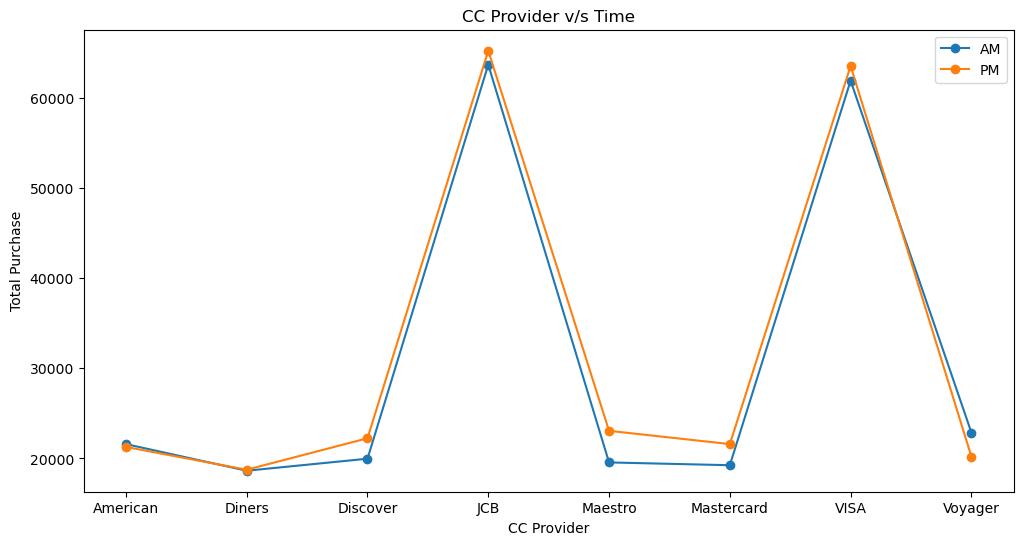

In [90]:
#5. How does purchase depend on ‘CC’ provider and time of purchase ‘AM or PM’?
e_pur['CC Provider'] = e_pur['CC Provider'].str.split().str[0]
CC_time_total = e_pur.groupby(['CC Provider','AM or PM'])['Purchase Price'].agg(['sum']).reset_index()
pivot_CC_time_total = CC_time_total.pivot(index ='CC Provider' , columns='AM or PM', values='sum' )

plt.figure(figsize=(12,6))
plt.plot(pivot_CC_time_total, marker ='o' )
plt.title('CC Provider v/s Time')
plt.ylabel('Total Purchase')
plt.xlabel('CC Provider')
plt.legend(['AM','PM'])

print("""only people own American and Voyager CC purchased in the morning more than in the evening, 
other types do the opposite""")
plt.show()

In [99]:
#6. What are top 5 Location(State) for purchases?
e_pur['State'] = e_pur['Address'].str.split(' ').str[-2]
location_total = e_pur.groupby('State')['Purchase Price'].agg(['sum'])
sort_location_total = location_total.sort_values(by=['sum'], ascending=False)
top_5_location= sort_location_total.head(5)
top_5_location

,sum
State,
AP,19563.98
AA,18096.87
AE,16387.21
IN,9415.40
MA,9394.40
